In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Data Processing

Training data

In [61]:
import tensorflow as tf

# Training dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',  
    labels="inferred",
    label_mode="categorical",  
    class_names=None,          
    color_mode="rgb",          
    batch_size=32,             
    image_size=(128, 128),    
    shuffle=True,              
    seed=123,                  
    validation_split=0.2,      
    subset="training",        
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)




Found 70295 files belonging to 38 classes.
Using 56236 files for training.


Testing data


In [118]:

test_set_actual = tf.keras.utils.image_dataset_from_directory(
    'train', 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,                  
    validation_split=0.2,      
    subset="validation",       
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


Validation data


In [63]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Model Build

In [64]:
cnn = tf.keras.models.Sequential()

CNN

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [66]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [67]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [70]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [71]:
cnn.add(tf.keras.layers.Flatten())

In [72]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [73]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

Output layer

In [74]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training

In [75]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1135s 645ms/step - accuracy: 0.7242 - loss: 0.9000 - val_accuracy: 0.8386 - val_loss: 0.5135
Epoch 2/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1052s 598ms/step - accuracy: 0.8582 - loss: 0.4473 - val_accuracy: 0.8947 - val_loss: 0.3276
Epoch 3/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 992s 564ms/step - accuracy: 0.9050 - loss: 0.2909 - val_accuracy: 0.9319 - val_loss: 0.2109
Epoch 4/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1016s 578ms/step - accuracy: 0.9334 - loss: 0.2033 - val_accuracy: 0.9370 - val_loss: 0.1950
Epoch 5/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1078s 613ms/step - accuracy: 0.9494 - loss: 0.1565 - val_accuracy: 0.9474 - val_loss: 0.1650
Epoch 6/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1065s 606ms/step - accuracy: 0.9609 - loss: 0.1195 - val_accuracy: 0.9537 - val_loss: 0.1434
Epoch 7/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1030s 586ms/step - accuracy: 0.9672 - loss: 0.1007 - val_accuracy: 0.9566 - val_loss: 0.1462
Epoch 8/12
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 980s 558ms/ste

Evaluating Model

In [82]:
#train acc
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 281s 160ms/step - accuracy: 0.9686 - loss: 0.0983
Training accuracy: 0.9710683822631836


In [83]:
#val acc
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - accuracy: 0.9307 - loss: 0.2471
Validation accuracy: 0.9317664504051208


Save

In [84]:
cnn.save('plant_disease_model.keras')

In [5]:
training_history.history 

NameError: name 'training_history' is not defined

In [4]:
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [87]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Acc Visual

In [3]:
epochs = [i for i in range(1,13)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

Matric for model

In [ ]:
class_name = validation_set.class_names

In [110]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [111]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 240s 14ms/step


In [112]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [113]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [114]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [116]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.80      0.88       504
                                 Apple___Black_rot       1.00      0.82      0.90       497
                          Apple___Cedar_apple_rust       0.86      0.99      0.92       440
                                   Apple___healthy       0.91      0.93      0.92       502
                               Blueberry___healthy       0.93      0.97      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.95      0.96       421
                 Cherry_(including_sour)___healthy       1.00      0.91      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.93      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.88      0.

Confusion Matrix

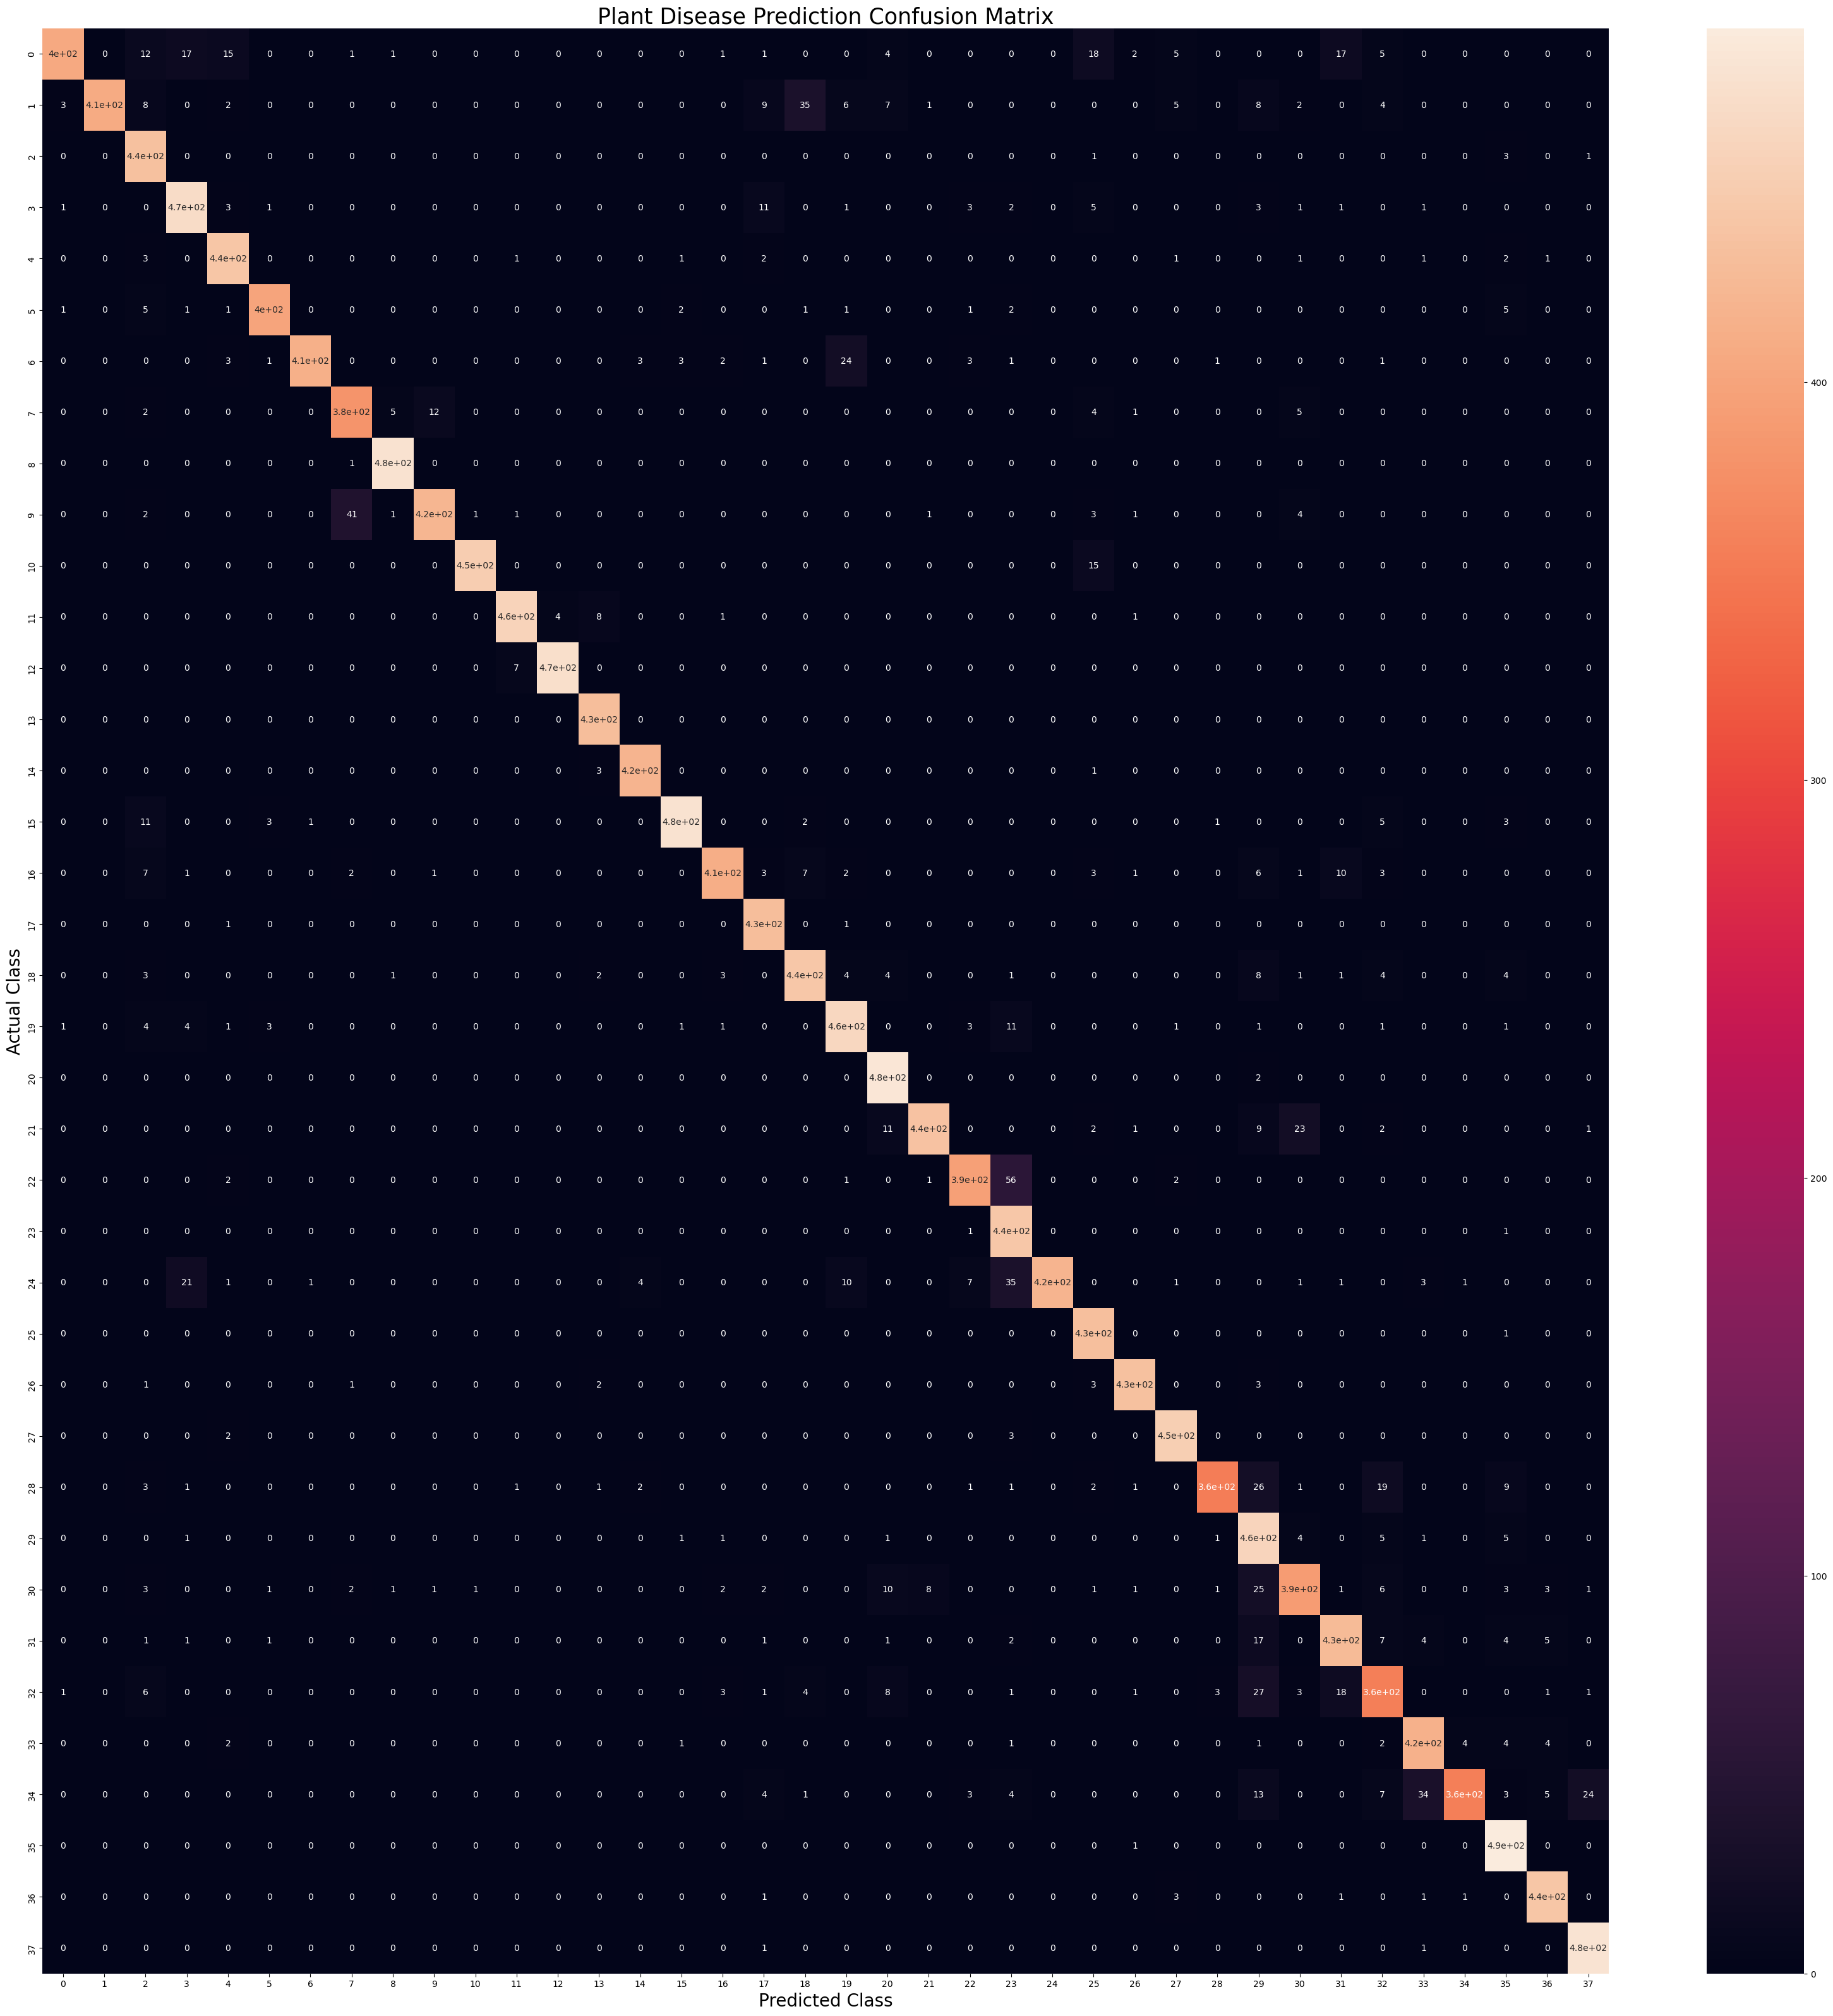

In [117]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

Accuracy with Test set

In [120]:
class_name_actual = test_set_actual.class_names

In [121]:
y_pred_actual = cnn.predict(test_set_actual)
predicted_categories_actual = tf.argmax(y_pred_actual, axis=1)

440/440 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step


In [122]:
true_categories_actual = tf.concat([y for x, y in test_set_actual], axis=0)
Y_true_actual = tf.argmax(true_categories_actual, axis=1)

In [123]:
Y_true_actual


<tf.Tensor: shape=(14059,), dtype=int64, numpy=array([ 6, 23,  5, ...,  3,  9,  6], dtype=int64)>

In [124]:
predicted_categories_actual

<tf.Tensor: shape=(14059,), dtype=int64, numpy=array([ 8,  9,  4, ..., 13,  1, 20], dtype=int64)>

In [125]:
from sklearn.metrics import confusion_matrix,classification_report
cm_test = confusion_matrix(Y_true_actual,predicted_categories_actual)

In [126]:
# Precision Recall Fscore
print(classification_report(Y_true_actual,predicted_categories_actual,target_names=class_name_actual))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.01      0.02       411
                                 Apple___Black_rot       0.03      0.02      0.02       410
                          Apple___Cedar_apple_rust       0.02      0.02      0.02       353
                                   Apple___healthy       0.04      0.04      0.04       379
                               Blueberry___healthy       0.02      0.03      0.03       385
          Cherry_(including_sour)___Powdery_mildew       0.04      0.04      0.04       327
                 Cherry_(including_sour)___healthy       0.05      0.04      0.05       370
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       342
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       395
               Corn_(maize)___Northern_Leaf_Blight       0.04      0.04      0.

Confusion Matrix

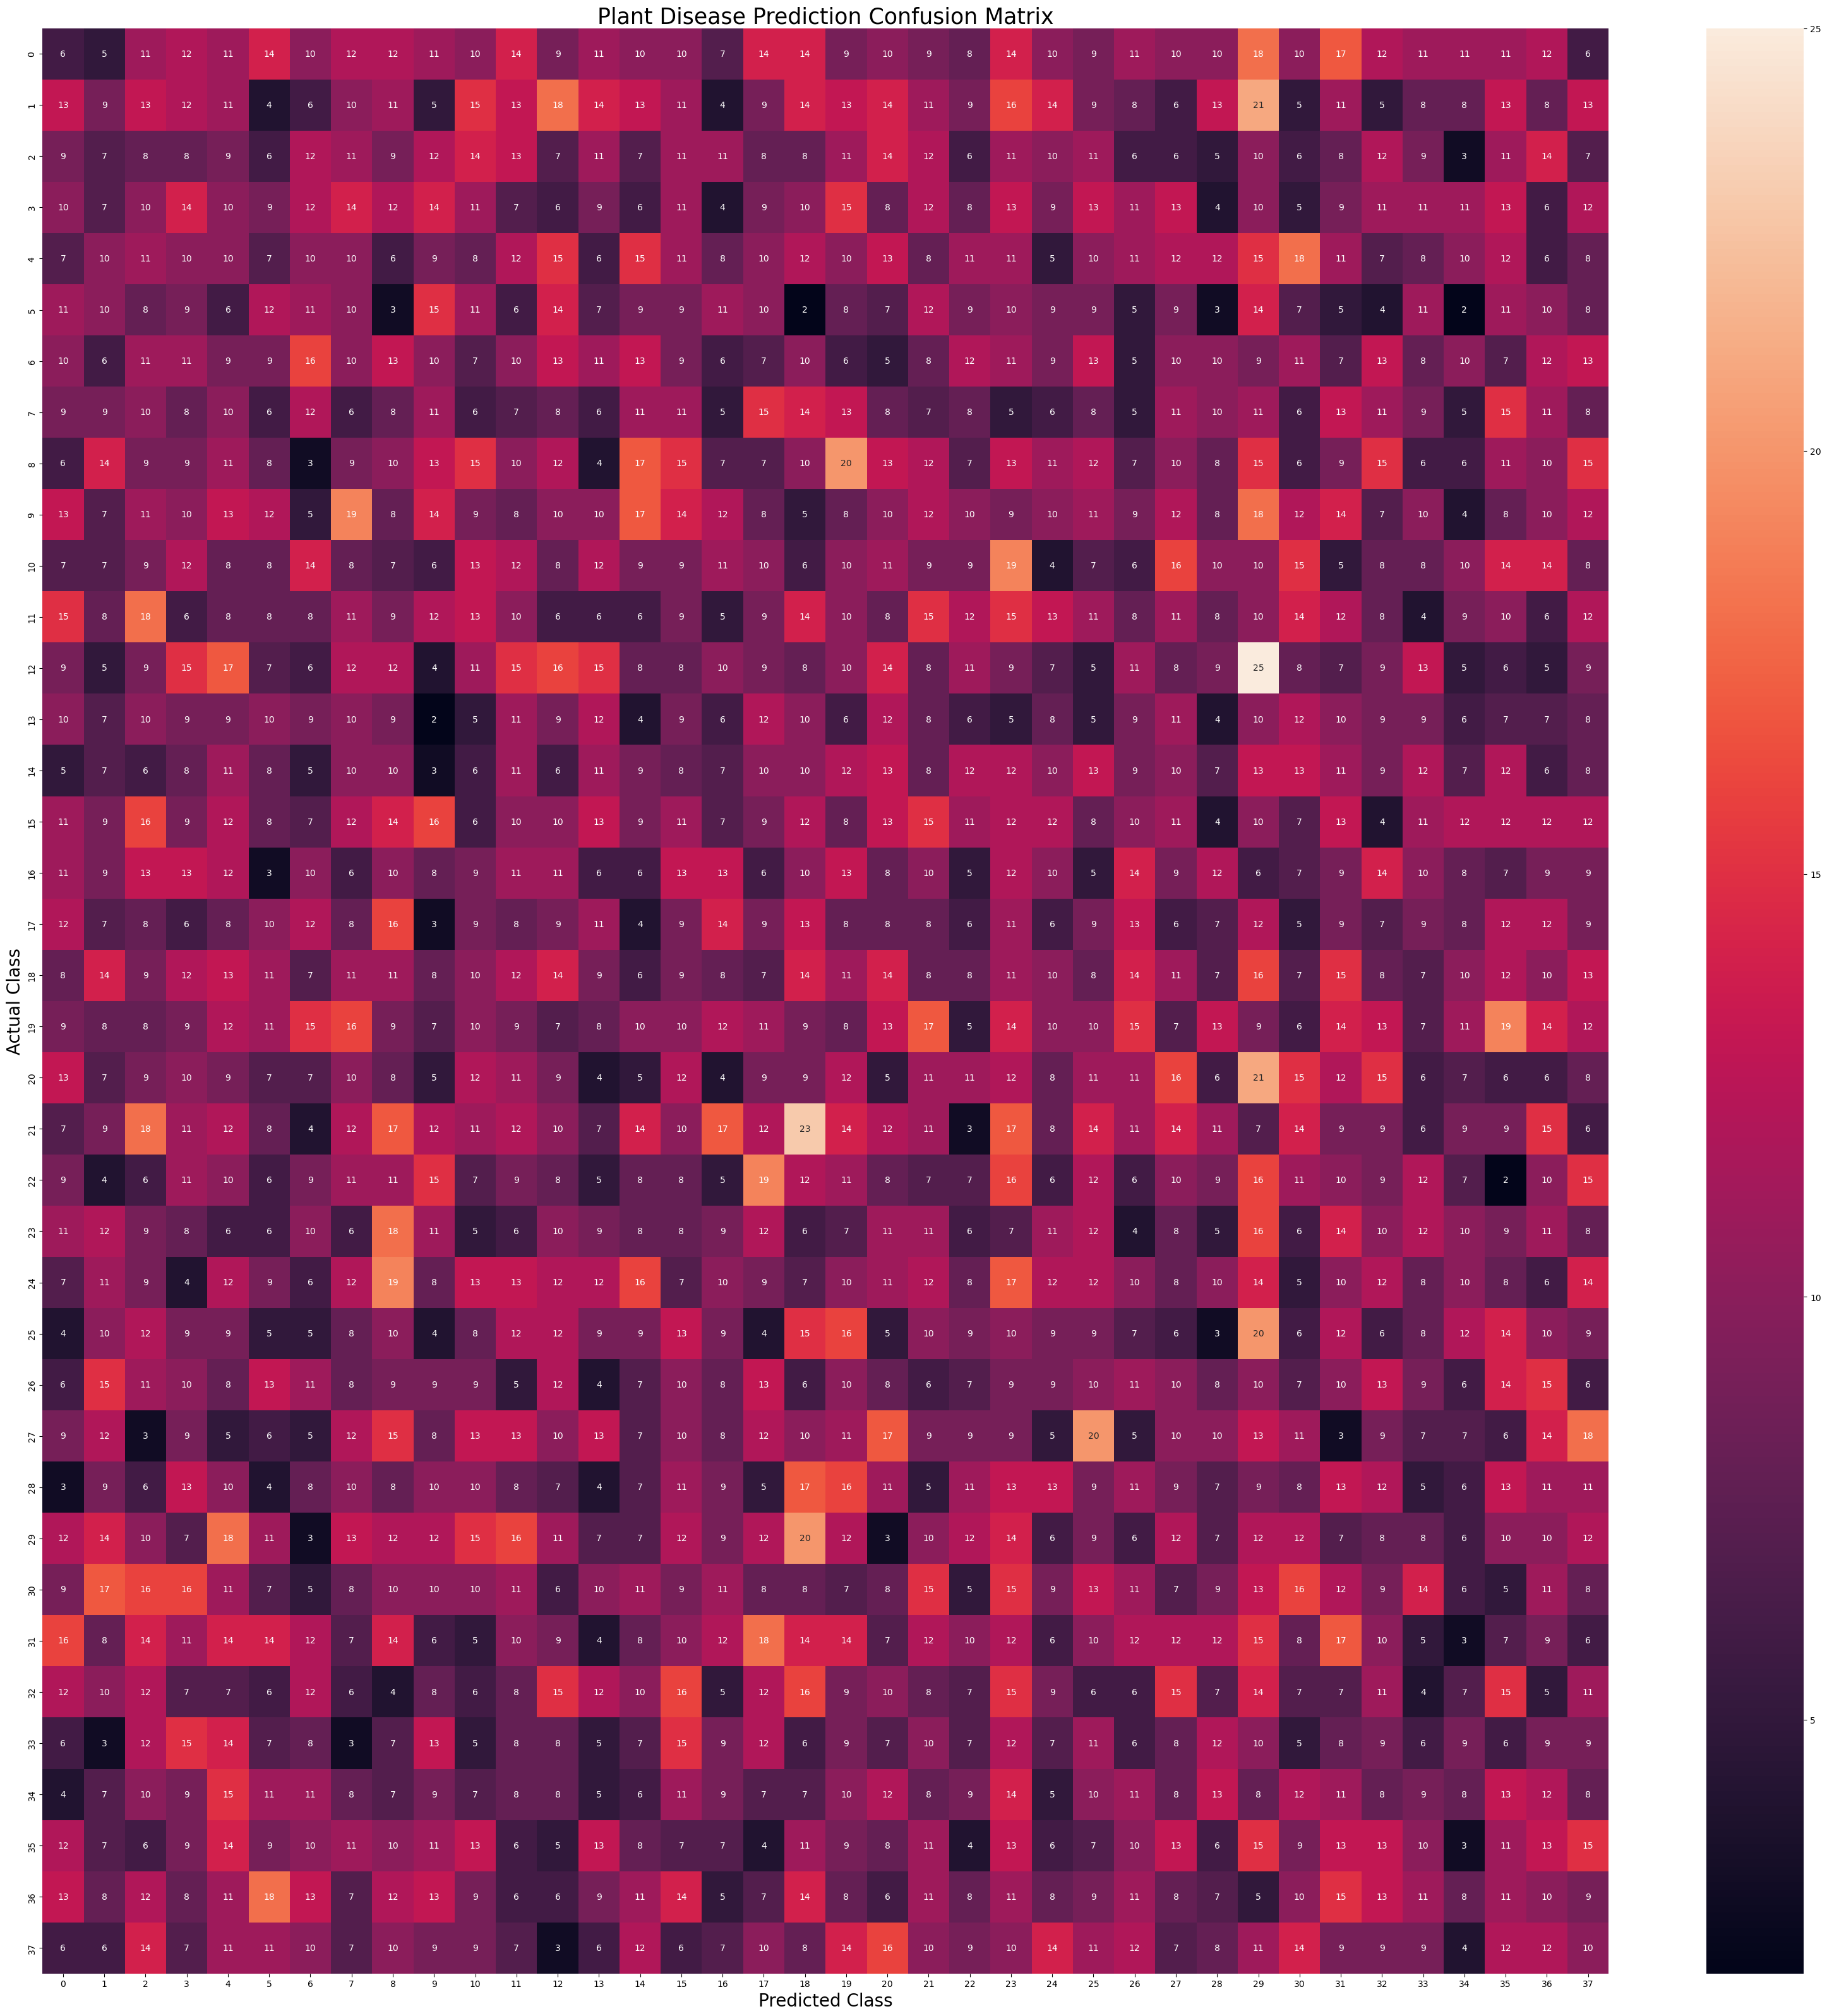

In [127]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm_test,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()